In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Admission_Predict.csv")

In [3]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df.shape

(400, 9)

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
from sklearn.preprocessing import Binarizer

In [7]:
bi = Binarizer(threshold = 0.75)

In [8]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [9]:
df['Chance of Admit '] =[1 if each > 0.75 else 0 for each in df['Chance of Admit ']]
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1
1,2,324,107,4,4.0,4.5,8.87,1,1
2,3,316,104,3,3.0,3.5,8.00,1,0
3,4,322,110,3,3.5,2.5,8.67,1,1
4,5,314,103,2,2.0,3.0,8.21,0,0


In [10]:
x= df[[ 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']]
y= df['Chance of Admit ']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [13]:
print(f"size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"x_test {x_test.shape}")
print(f"y_test {y_test.shape}")

size of splitted data
x_train (300, 7)
y_train (300,)
x_test (100, 7)
y_test (100,)


In [14]:
from sklearn.tree import DecisionTreeRegressor

In [15]:
model_dt = DecisionTreeRegressor(random_state=1)

In [16]:
model_dt.fit(x_train, y_train)

DecisionTreeRegressor(random_state=1)

In [17]:
y_pred_dt = model_dt.predict(x_test)

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn. metrics import classification_report

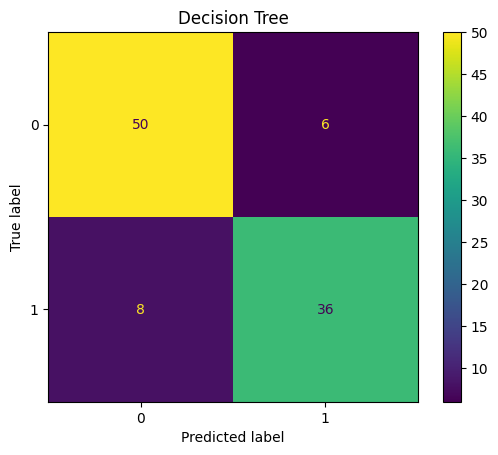

Accuracy is 0.86
              precision    recall  f1-score   support

           0       0.86      0.89      0.88        56
           1       0.86      0.82      0.84        44

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.title("Decision Tree")
plt.show()
print(f"Accuracy is {accuracy_score(y_test, y_pred_dt)}")
print(classification_report(y_test, y_pred_dt))